In [1]:
import numpy as np
import matplotlib.pyplot as plt

from hazma.gamma_ray_parameters import *

'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


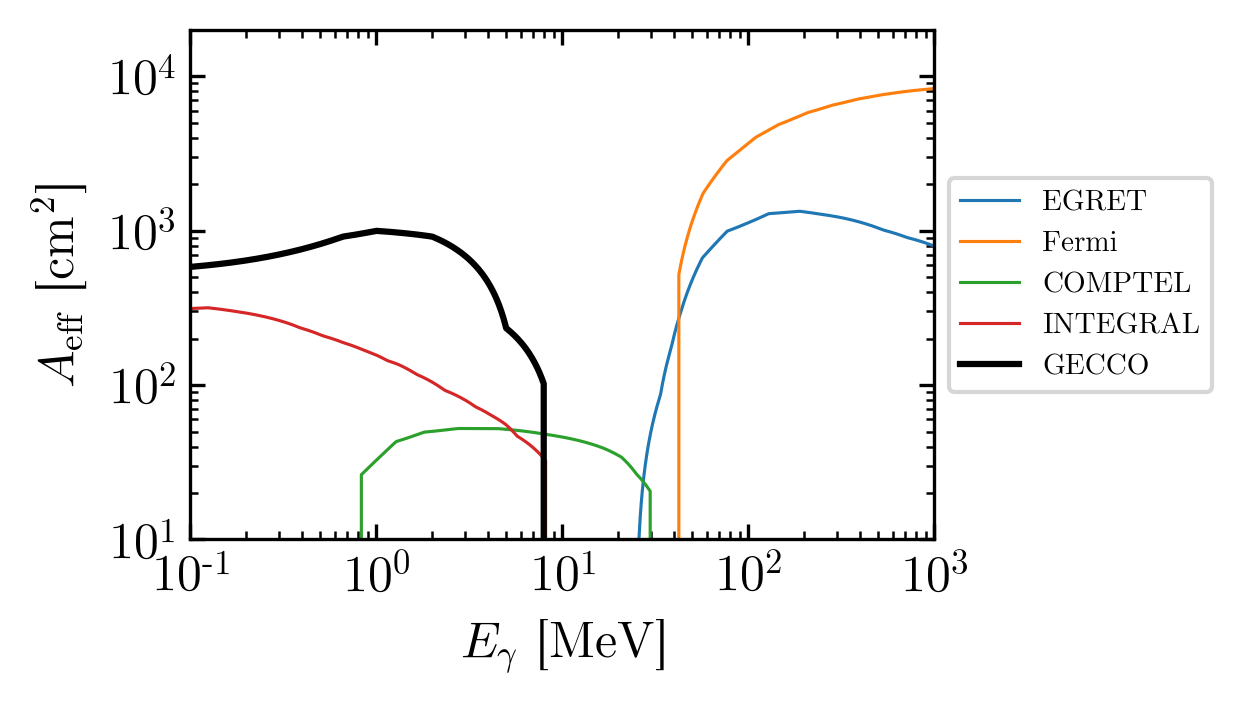

In [46]:
plt.figure(figsize=(4, 2.25))

e_gams = np.geomspace(0.1, 1e3, 2000)

# telescope_colors = mpl_colors

plt.plot(
    e_gams,
    A_eff_egret(e_gams),
#     # color=telescope_colors["egret"],
    label="EGRET",
    linewidth=0.75,
)
plt.plot(
    e_gams,
    A_eff_fermi(e_gams),
    # color=telescope_colors["fermi"],
    label="Fermi",
    linewidth=0.75,
)
plt.plot(
    e_gams,
    A_eff_comptel(e_gams),
    # color=telescope_colors["comptel"],
    label="COMPTEL",
    linewidth=0.75,
)
plt.plot(
    e_gams,
    A_eff_integral(e_gams),
    # color=telescope_colors["comptel"],
    label="INTEGRAL",
    linewidth=0.75,
)
# plt.plot(
#     e_gams, A_eff_adept(e_gams),
#     # color=telescope_colors["adept"],
#     label="AdEPT"
# )
# plt.plot(
#     e_gams, A_eff_amego(e_gams),
#     # color=telescope_colors["amego"],
#     label="AMEGO"
# )
# plt.plot(
#     e_gams,
#     A_eff_all_sky_astrogam(e_gams),
#     # color=telescope_colors["e_astrogam"],
#     label="AS-ASTROGAM",
# )
# # plt.plot(
# #     e_gams,
# #     A_eff_e_astrogam(e_gams),
# #     # color=telescope_colors["e_astrogam"],
# #     label="e-ASTROGAM",
# # )
plt.plot(
    e_gams, A_eff_gecco(e_gams),
    "k",
    # color=telescope_colors["gecco"],
    label="GECCO"
)
# plt.plot(
#     e_gams, A_eff_pangu(e_gams),
#     # color=telescope_colors["pangu"],
#     label="PANGU"
# )
# plt.plot(
#     e_gams, A_eff_grams(e_gams),
#     # color=telescope_colors["grams"],
#     label="GRAMS"
# )

plt.xlim(e_gams[[0, -1]])
plt.ylim(1e1, 2e4)
plt.xscale("log")
plt.yscale("log")
plt.gca().xaxis.set_ticks_position("both")
plt.gca().yaxis.set_ticks_position("both")
plt.gca().tick_params(axis="both", which="both", direction="in")
plt.xlabel(r"$E_\gamma$ [MeV]")
plt.ylabel(r"$A_\mathrm{eff}$ [cm$^2$]")

box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=7)

# plt.savefig("figures/a_effs_matching.pdf", bbox_inches="tight")
# plt.savefig("/Users/acoogan/Downloads/a_effs_matching.pdf", bbox_inches="tight")

[]

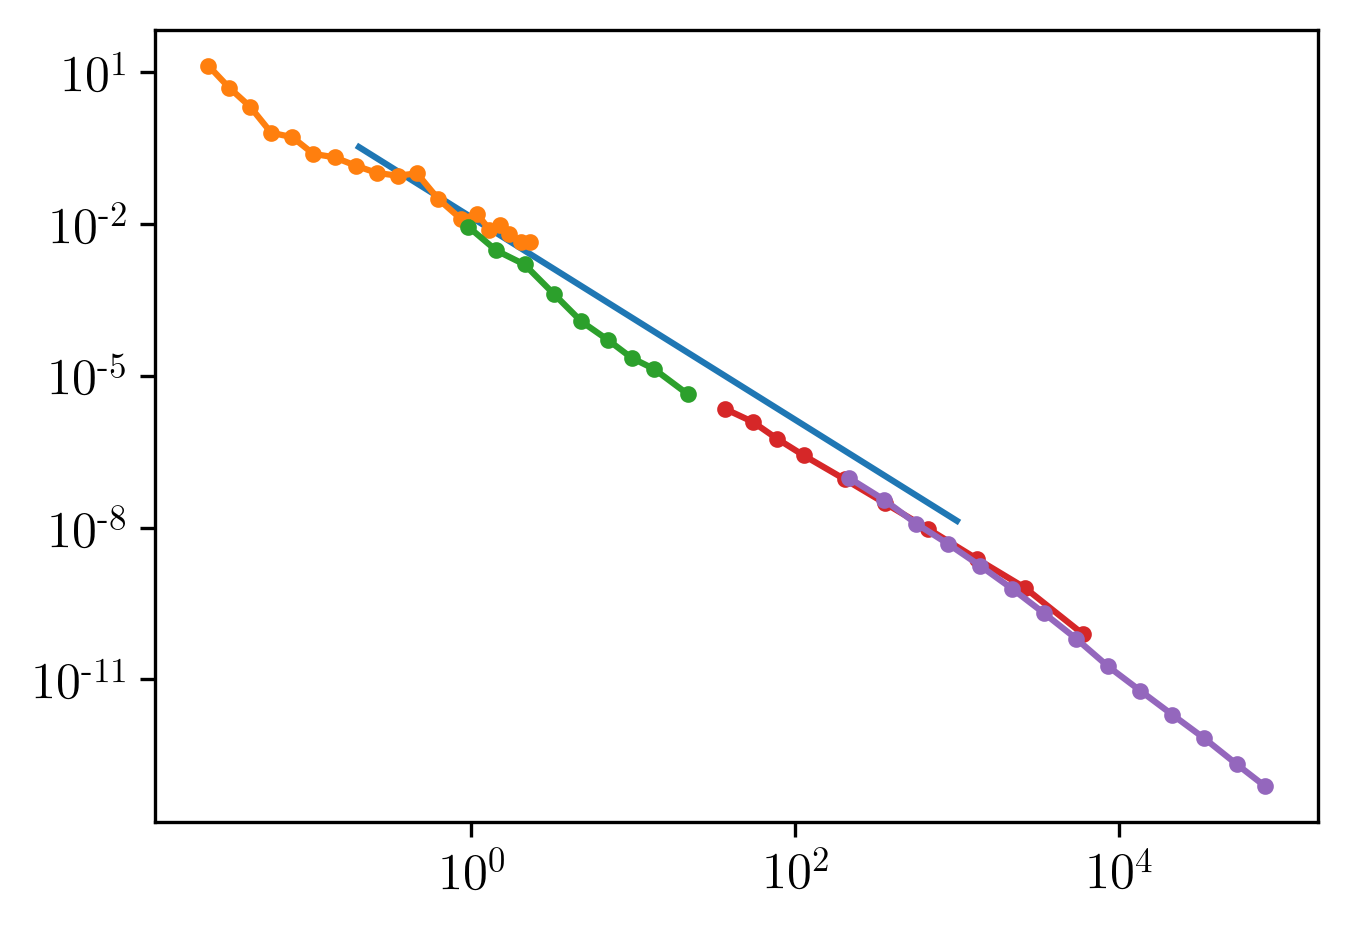

In [82]:
# Background vs flux measurements
e_gams_sliced = e_gams[
    (e_gams >= gc_bg_model.e_range[0]) & (e_gams <= gc_bg_model.e_range[1])
]

plt.plot(
    e_gams_sliced,
    5 * default_bg_model.dPhi_dEdOmega(e_gams_sliced)
)

plt.plot(
    (integral_diffuse.e_highs + integral_diffuse.e_lows) / 2,
    integral_diffuse.fluxes + 2 * integral_diffuse.upper_errors,
    ".-"
)
plt.plot(
    (comptel_diffuse.e_highs + comptel_diffuse.e_lows) / 2,
    comptel_diffuse.fluxes + 2 * comptel_diffuse.upper_errors,
    ".-"
)
plt.plot(
    (egret_diffuse.e_highs + egret_diffuse.e_lows) / 2,
    egret_diffuse.fluxes + 2 * egret_diffuse.upper_errors,
    ".-"
)
plt.plot(
    (fermi_diffuse.e_highs + fermi_diffuse.e_lows) / 2,
    fermi_diffuse.fluxes + 2 * fermi_diffuse.upper_errors,
    ".-"
)

plt.loglog()

<ipython-input-173-7f51fb5e5521>:30: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, None)
'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


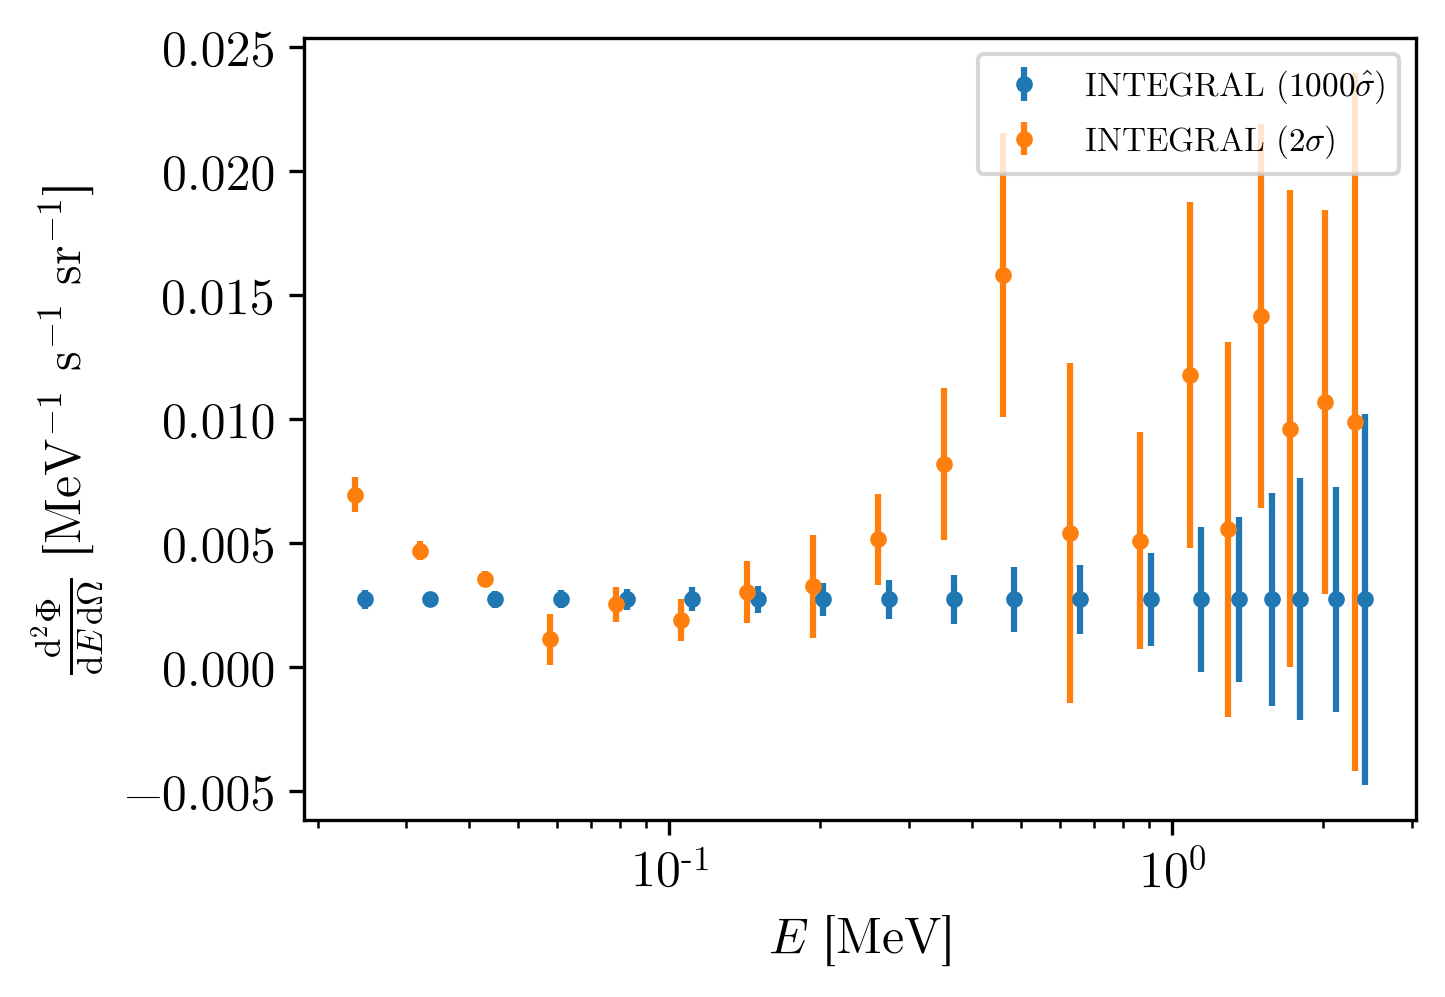

In [173]:
e_centers = (integral_diffuse.e_highs + integral_diffuse.e_lows) / 2
T_obs = 1e8  # s
sigmas = 1000 * np.sqrt(
    default_bg_model.dPhi_dEdOmega(e_centers) / (
        (integral_diffuse.e_highs - integral_diffuse.e_lows) *
        T_obs *
        A_eff_integral(e_centers) *
        integral_diffuse_target.dOmega
    )
)
plt.errorbar(
    e_centers * 1.05,
    default_bg_model.dPhi_dEdOmega(e_centers) * e_centers**2,
    2 * sigmas * e_centers**2,
    label="INTEGRAL ($1000 \hat{\sigma}$)",
    fmt=".",
#     color="k",
#     alpha=0.2
)
e_integrals = (integral_diffuse.e_highs + integral_diffuse.e_lows) / 2
plt.errorbar(
    e_integrals,
    integral_diffuse.fluxes * e_integrals**2,
    2 * integral_diffuse.upper_errors * e_integrals**2,
    label=r"INTEGRAL ($2 \sigma$)",
    fmt="."
)
plt.semilogx()
plt.legend(fontsize=8)
plt.xlim(0, None)
plt.xlabel(r"$E$ [MeV]")
plt.ylabel(
    r"$\frac{\mathrm{d}^2\Phi}{\mathrm{d}E\, \mathrm{d}\Omega}$ [MeV$^{-1}$ s$^{-1}$ sr$^{-1}$]"
)
plt.tight_layout()
plt.savefig("figures/integral-consistency.pdf")

/Users/acoogan/Physics/Sub-GeV_DM/Hazma/hazma/background_model.py:48: UserWarning: The gamma ray background model is not applicable for energy 13599.098893 MeV.
  warnings.warn(
<ipython-input-172-da80c1170860>:30: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, None)
'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


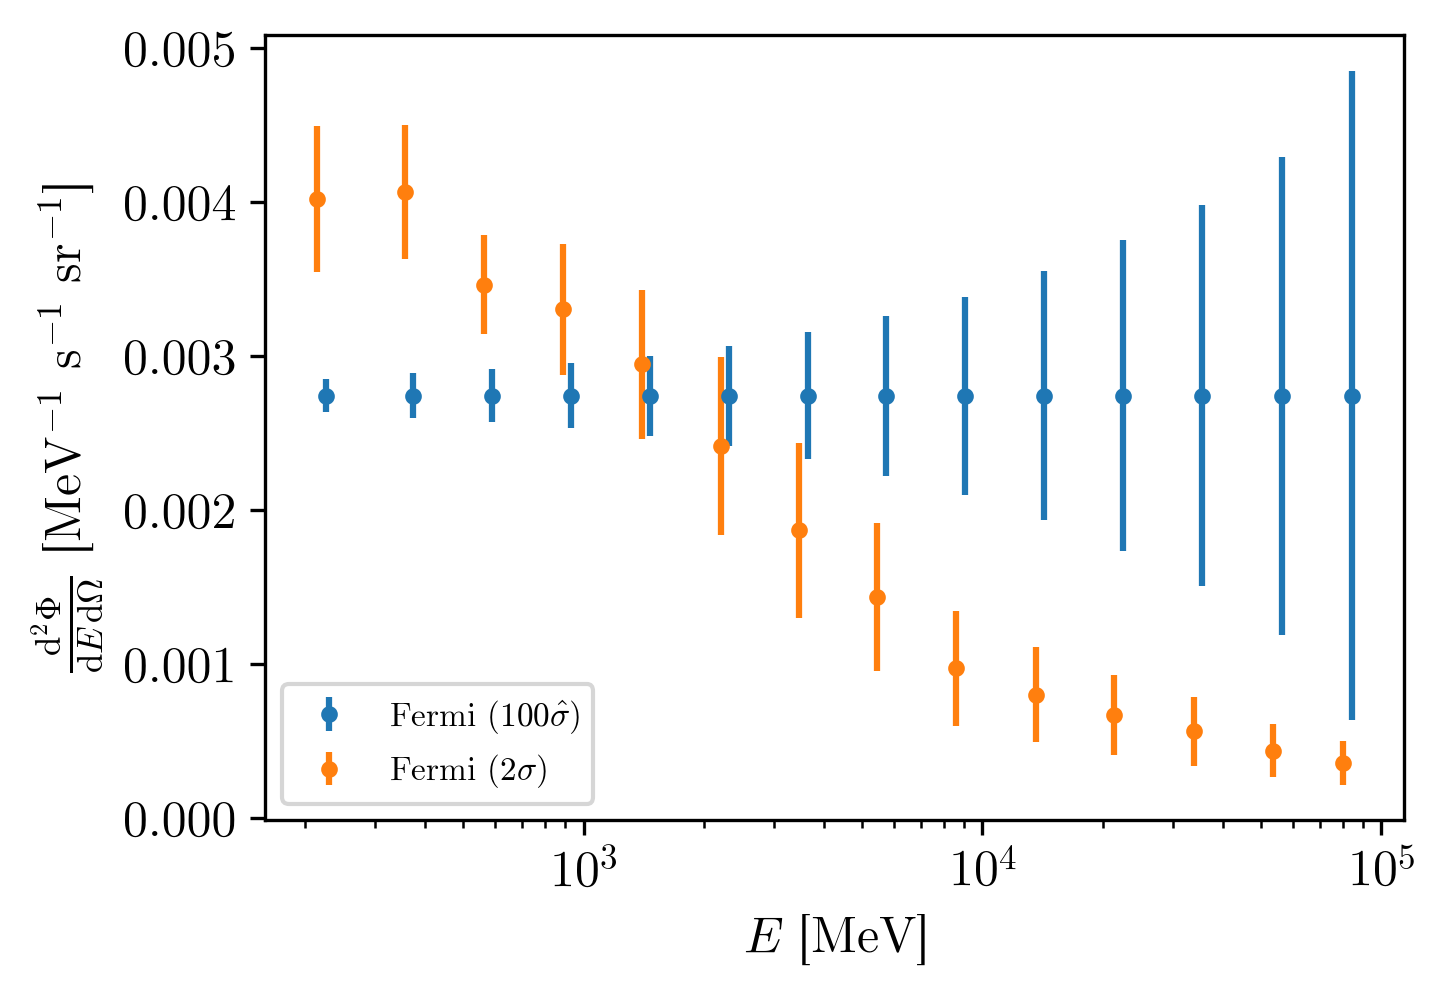

In [172]:
e_centers = (fermi_diffuse.e_highs + fermi_diffuse.e_lows) / 2
T_obs = 5.519e7  # s
sigmas = 100 * np.sqrt(
    default_bg_model.dPhi_dEdOmega(e_centers) / (
        (fermi_diffuse.e_highs - fermi_diffuse.e_lows) *
        T_obs *
        A_eff_fermi(e_centers) *
        fermi_diffuse_target.dOmega
    )
)
plt.errorbar(
    e_centers * 1.05,
    default_bg_model.dPhi_dEdOmega(e_centers) * e_centers**2,
    2 * sigmas * e_centers**2,
    label=r"Fermi ($100 \hat{\sigma}$)",
    fmt=".",
#     color="k",
#     alpha=0.2
)
e_fermis = (fermi_diffuse.e_highs + fermi_diffuse.e_lows) / 2
plt.errorbar(
    e_fermis,
    fermi_diffuse.fluxes * e_fermis**2,
    2 * fermi_diffuse.upper_errors * e_fermis**2,
    label=r"Fermi ($2 \sigma$)",
    fmt="."
)
plt.semilogx()
plt.legend(fontsize=8, loc="lower left")
plt.xlim(0, None)
plt.xlabel(r"$E$ [MeV]")
plt.ylabel(
    r"$\frac{\mathrm{d}^2\Phi}{\mathrm{d}E\, \mathrm{d}\Omega}$ [MeV$^{-1}$ s$^{-1}$ sr$^{-1}$]"
)
plt.tight_layout()
plt.savefig("figures/fermi-consistency.pdf")